In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [57]:
merged_file = pd.read_csv('.\Market_food_prices_w_temp_replaced.csv')
merged_file.columns = ['country_id'	,'country','locality_id','locality_name','mkt_id','mkt_name','commodity_purchase_id',
                       'currency_id','currency_name','mkt_type_id','mkt_type','measurement_id',
                       'measurement_unit','price_paid','commodity_source','measurement_const','measurement_unit_type',
                       'avg_temp','avg_temp_uncty','period','price_in_USD','converted_const','converted_unit', 'commodity_purchased']

Drop columns that are not required

In [58]:
cols = ['locality_id','locality_name','mkt_id','mkt_name','currency_id', 'currency_name', 
        'measurement_id','measurement_unit','price_paid','measurement_const','measurement_unit_type', 
        'mkt_type', 'converted_const']
merged_file.drop(cols ,axis=1, inplace=True)
merged_file.to_csv('.\Market_food_prices_w_temp_converted_clean.csv', index=False)

Check for outliers in each variable

In [59]:
sns.set(rc={'figure.figsize':(40,15)})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

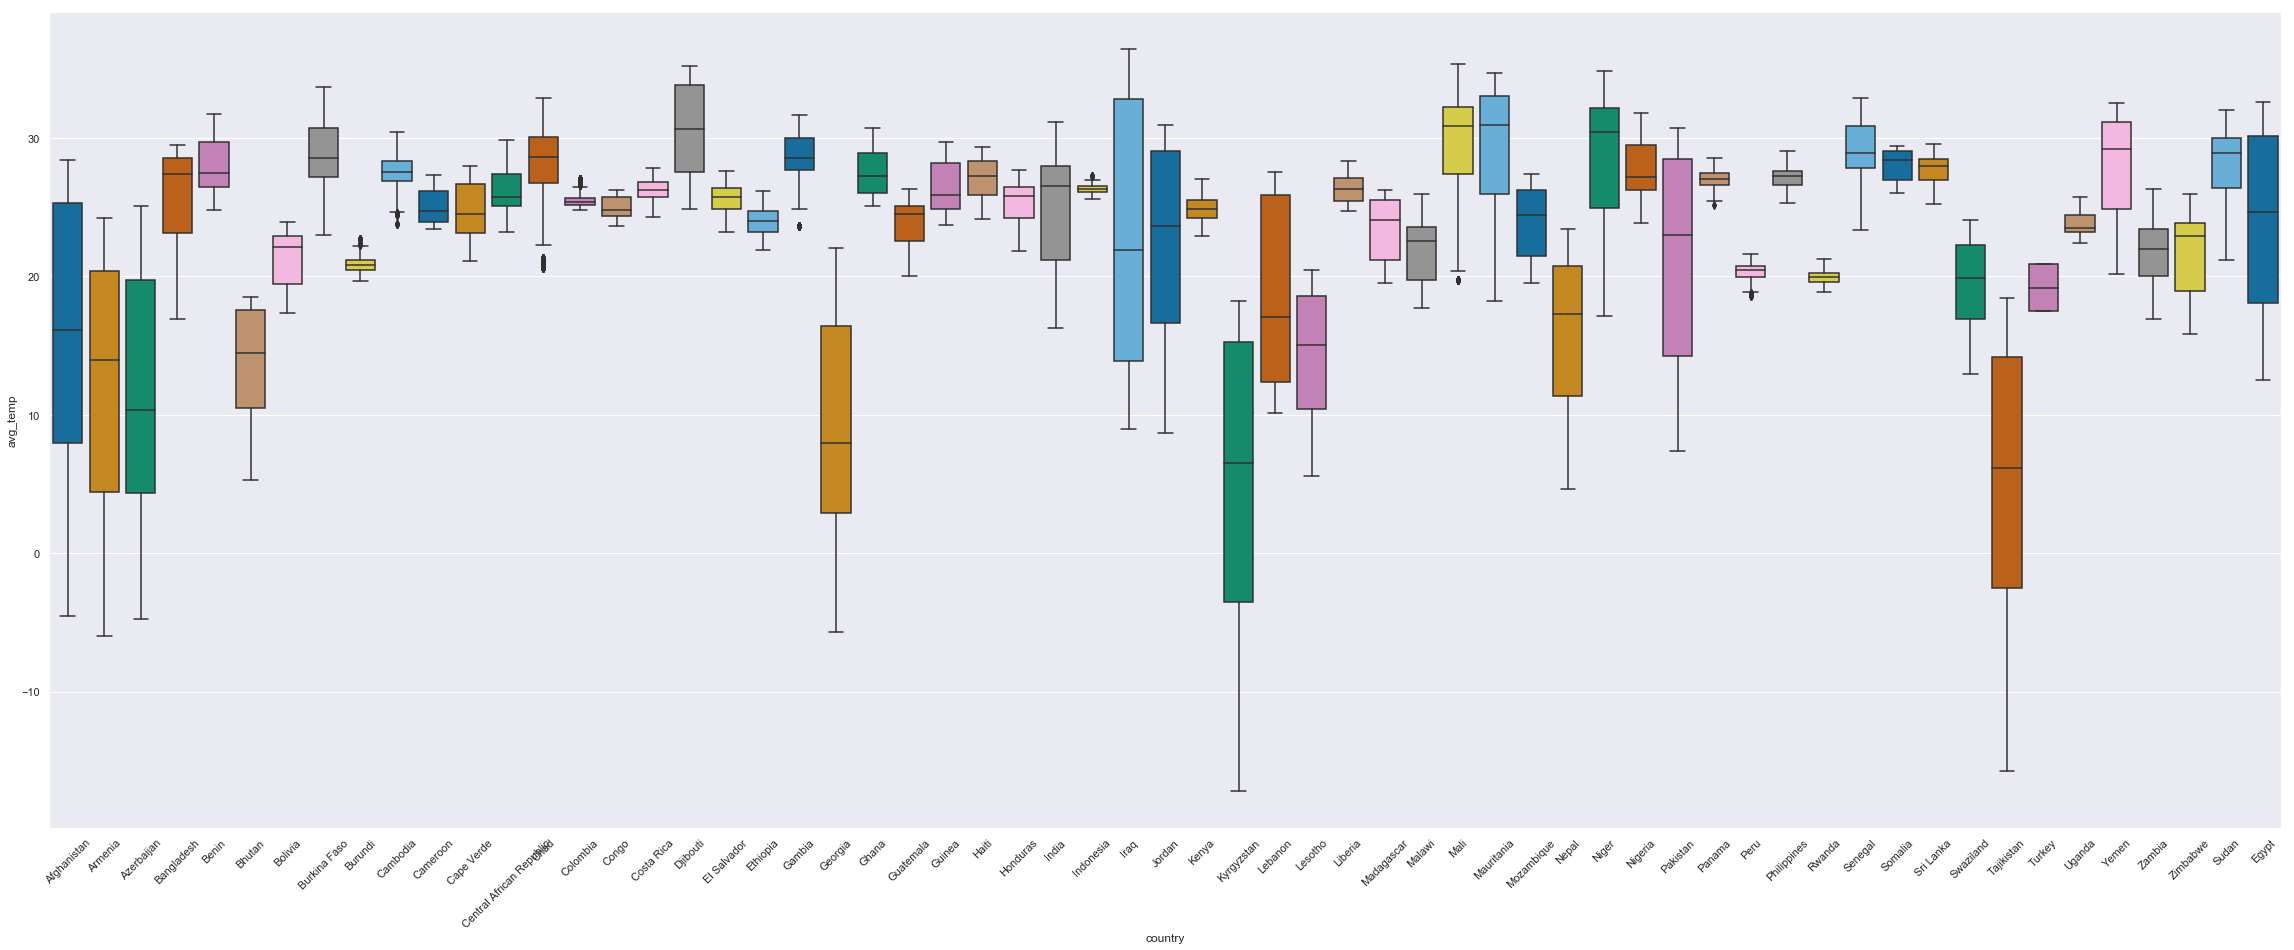

In [60]:
#Avg_temp per country
sns.boxplot(x=merged_file['country'],y=merged_file['avg_temp'],width=0.8, fliersize=5, palette="colorblind")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

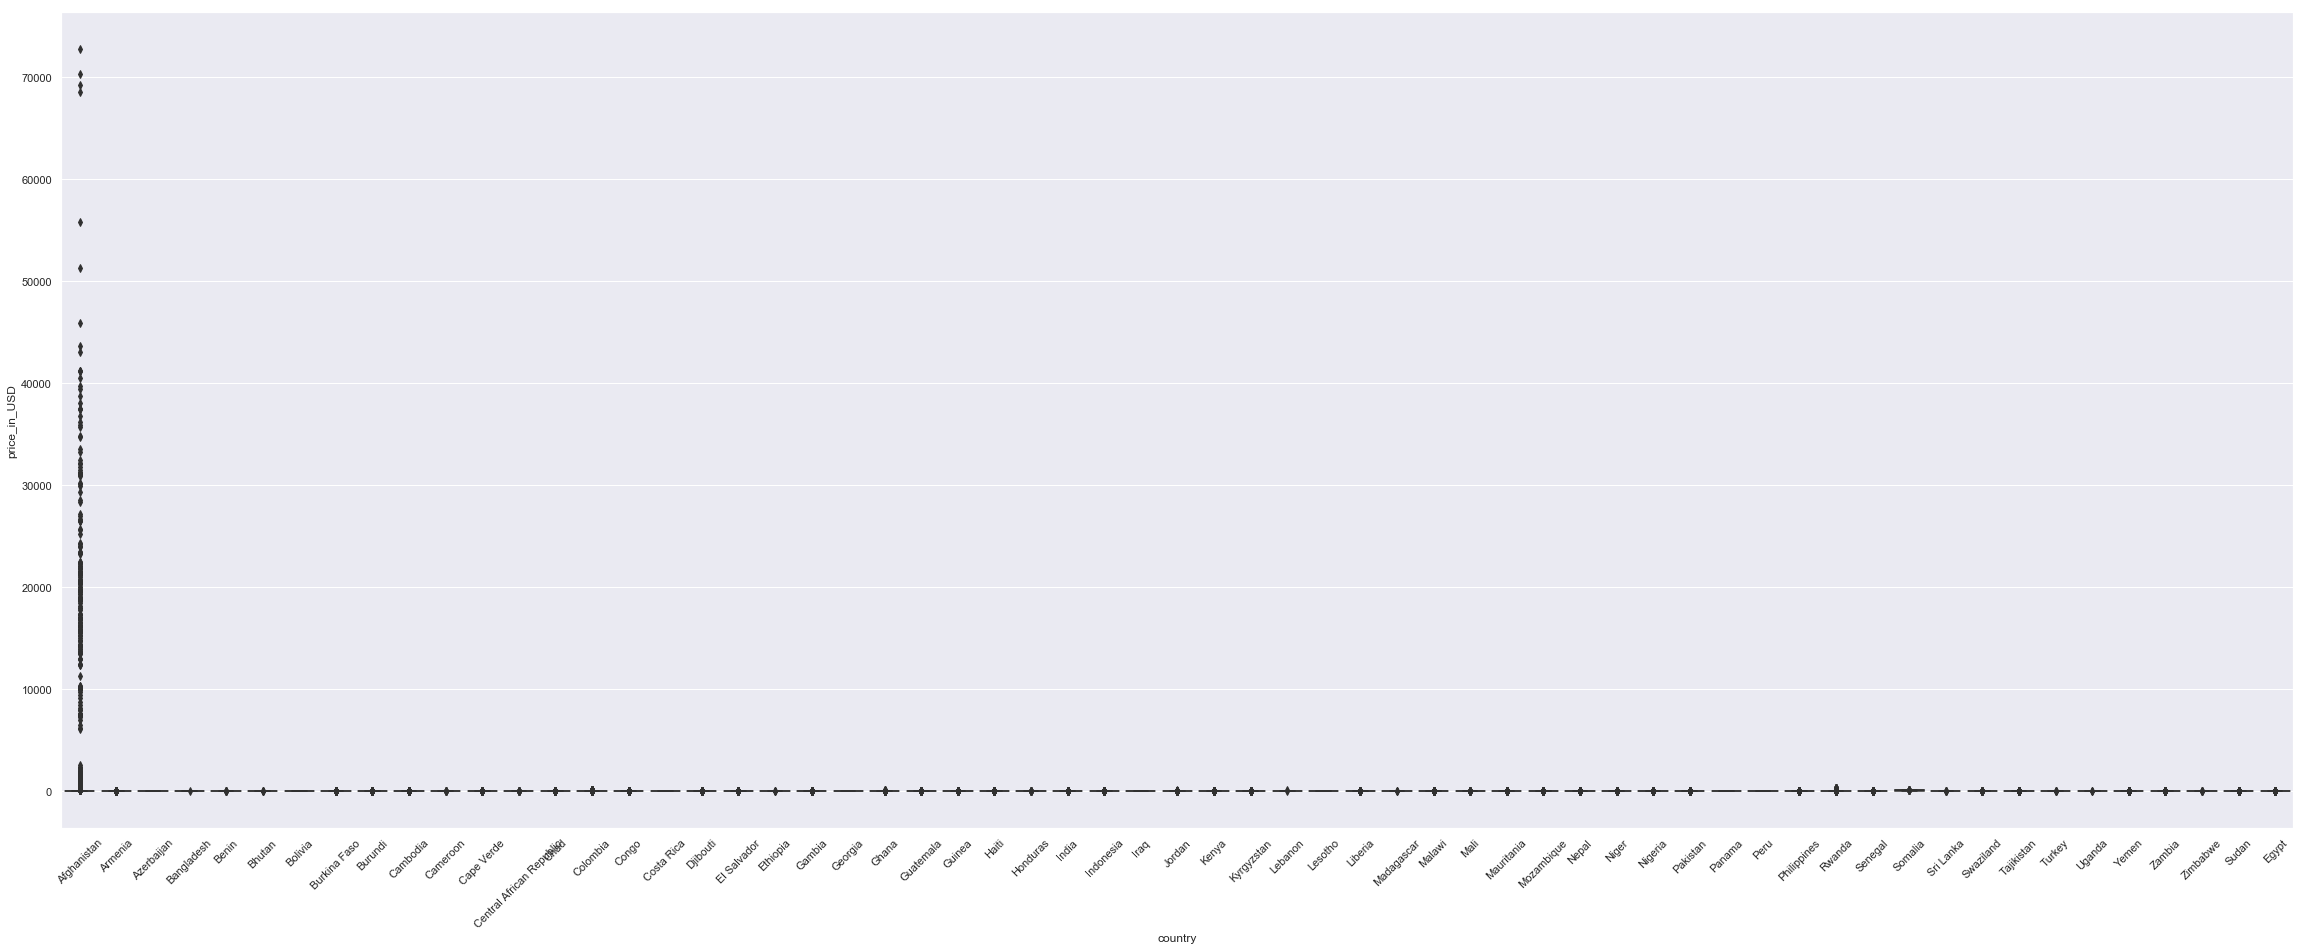

In [61]:
#Price_in_USD per country
sns.boxplot(x=merged_file['country'],y=merged_file['price_in_USD'],width=0.8, fliersize=5, palette="colorblind")
plt.xticks(rotation=45)

In [62]:
sns.set(rc={'figure.figsize':(11,8)})

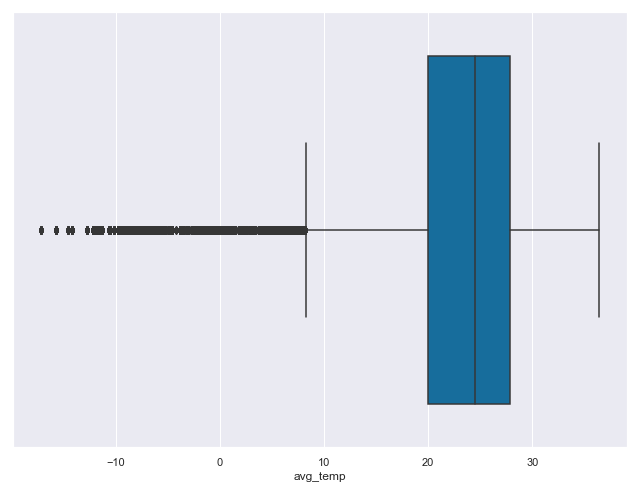

In [63]:
sns.boxplot(x=merged_file['avg_temp'],width=0.8,palette="colorblind")

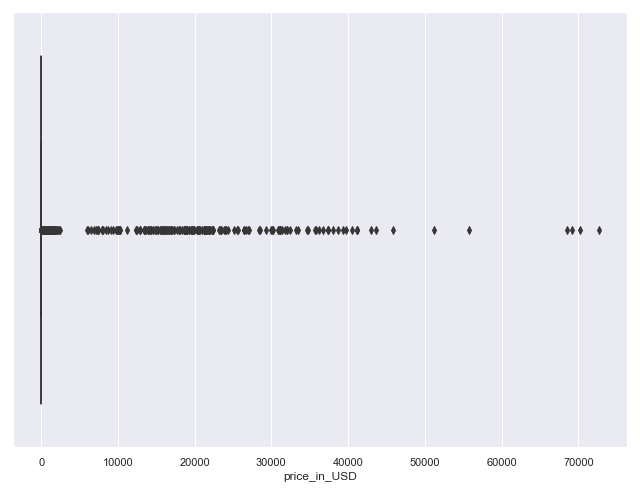

In [64]:
sns.boxplot(x=merged_file['price_in_USD'], width=0.8, palette="colorblind")

In [65]:
Q1 = merged_file.quantile(0.25)
Q3 = merged_file.quantile(0.75)
IQR = Q3 - Q1
print (IQR)

country_id               90.000000
commodity_purchase_id    20.000000
mkt_type_id               0.000000
commodity_source         43.000000
avg_temp                  7.847000
avg_temp_uncty            0.272000
price_in_USD              0.428771
dtype: float64


In [66]:
merged_file.set_index('period', inplace=True)
df_num = merged_file[['avg_temp', 'price_in_USD']]
df_result = (df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))
df_join = pd.concat([merged_file, df_result], axis=1)
df_join.to_csv(r".\outliers-numeric_cols.csv", index=True, header=True)

Group the data per country based on commodity and date - apply the mean of the prices

In [67]:
merged_file_group = merged_file.groupby(['period', 'country', 'country_id', 
                                         'commodity_purchased','commodity_purchase_id', 'avg_temp','converted_unit', 
                                         'avg_temp_uncty'])['price_in_USD'].mean().reset_index()
merged_file_group.set_index('period', inplace=True)
merged_file_group.to_csv('.\Market_food_prices_w_temp_grouped.csv', index=True)

In [68]:
print("Merged grouped file")
print("="*60)
print(merged_file_group.info())
print("="*60)
print("Shape of the file")
print("="*60)
print(merged_file_group.shape)
print("="*60)
print("Unique values")
print("="*60)
print(merged_file_group.nunique())
print("="*60)
print("Describe the file")
print("="*60)
print(merged_file_group.describe(include='all'))
print("="*60)
print("Check for any null values")
print("="*60)
print(merged_file_group.isnull().sum())

Merged grouped file
<class 'pandas.core.frame.DataFrame'>
Index: 27635 entries, 1992-01-01 to 2013-09-01
Data columns (total 8 columns):
country                  27635 non-null object
country_id               27635 non-null int64
commodity_purchased      27635 non-null object
commodity_purchase_id    27635 non-null int64
avg_temp                 27635 non-null float64
converted_unit           27635 non-null object
avg_temp_uncty           27635 non-null float64
price_in_USD             27635 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.9+ MB
None
Shape of the file
(27635, 8)
Unique values
country                     61
country_id                  61
commodity_purchased         70
commodity_purchase_id       70
avg_temp                  4988
converted_unit               4
avg_temp_uncty             984
price_in_USD             23924
dtype: int64
Describe the file
           country    country_id commodity_purchased  commodity_purchase_id  \
count        27635